In [2]:
import cv2
import numpy as np

def get_sharpened_frame(frame):
    blurred_frame = cv2.GaussianBlur(frame, (19, 19), 0)
    frame_edges = cv2.subtract(frame, blurred_frame * 5)
    sharpened_frame = cv2.add(frame, frame_edges)
    return sharpened_frame

def get_orange_regions(frame):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_orange = np.array([0, 100, 100])
    upper_orange = np.array([15, 255, 255])
    mask = cv2.inRange(hsv_frame, lower_orange, upper_orange)
    orange_regions = cv2.bitwise_and(frame, frame, mask=mask)
    return orange_regions

video_capture = cv2.VideoCapture('video.mp4')

while True:
    ret, frame = video_capture.read()
    
    if not ret:
        break

    sharpened_frame = get_sharpened_frame(frame)

    orange_regions = get_orange_regions(sharpened_frame)

    cv2.imshow('Orange Regions', orange_regions)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
video_capture.release()
cv2.destroyAllWindows()

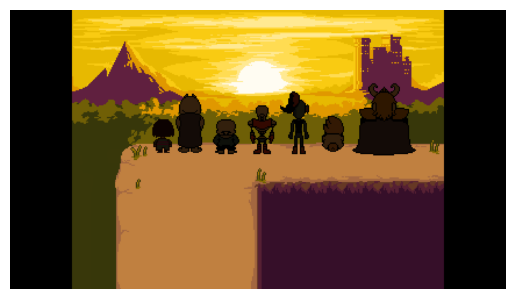

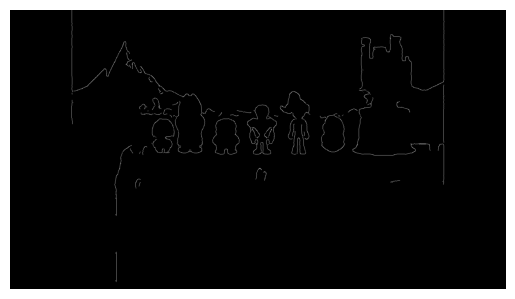

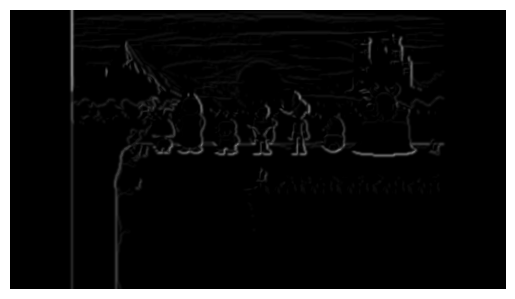

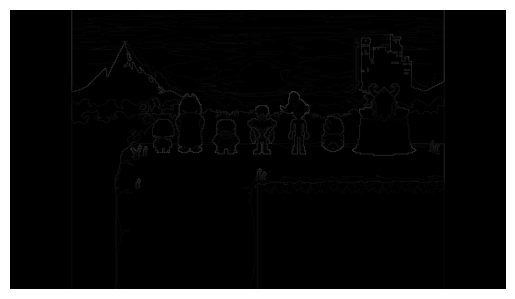

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_img(img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.show()

def get_canny_img(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray_img, (25, 25), 0)
    canny_img = cv2.Canny(blurred_img, 20, 60)
    return canny_img

def get_sobel_img(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray_img, (25, 25), 0)
    Sobel_X = cv2.Sobel(blurred_img, -1, 1, 0) 
    Sobel_Y = cv2.Sobel(blurred_img, -1, 0, 1)
    sobel_img = cv2.bitwise_or(Sobel_X, Sobel_Y)
    return sobel_img

def get_laplacian_img(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian_img = cv2.Laplacian(gray_img, -1)
    return laplacian_img

img = cv2.imread("UNDERTALE.png")
display_img(img)

canny_img = get_canny_img(img)
display_img(canny_img)

sobel_img = get_sobel_img(img)
display_img(sobel_img)

laplacian_img = get_laplacian_img(img)
display_img(laplacian_img)